<a href="https://colab.research.google.com/github/Zichenxzc/Mouse-Motor-Cortex-Gene-Dataset-/blob/main/Mouse_Motor_Cortex_project_loadcomparative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1


In [18]:
# insatll scanpy
!pip install --quiet 'scanpy[leiden]'

In [ ]:
# Download human brain RNA-seq from Zemke et al 2023
#!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fhuman%5Ffiltered%5Fbarcodes.tsv.gz
#!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fhuman%5Ffiltered%5Ffeatures.tsv.gz
#!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fhuman%5Ffiltered%5Fmatrix.mtx.gz
#!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fhuman%5Ffiltered%5Fmetadata.tsv.gz

In [29]:
!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fmouse%5Ffiltered%5Fbarcodes.tsv.gz
!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fmouse%5Ffiltered%5Ffeatures.tsv.gz
!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fmouse%5Ffiltered%5Fmatrix.mtx.gz
!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fmouse%5Ffiltered%5Fmetadata.tsv.gz

In [ ]:
!wget -q https://static-content.springer.com/esm/art%3A10.1007%2Fs12035-015-9103-8/MediaObjects/12035_2015_9103_MOESM1_ESM.pdf

In [20]:
# ls lists the files you currently have
!ls

12035_2015_9103_MOESM1_ESM.pdf		  GSE229169_mouse_filtered_matrix.mtx.gz    sample_data
GSE229169_mouse_filtered_barcodes.tsv.gz  GSE229169_mouse_filtered_metadata.tsv.gz
GSE229169_mouse_filtered_features.tsv.gz  mouse_data


In [ ]:
#!mkdir -p human_data
#!mv -t human_data *.gz

In [21]:
!mkdir -p mouse_data
!mv -t mouse_data *.gz

In [22]:
import scanpy as sc
import pandas as pd

In [ ]:
#!zcat human_data/GSE229169_human_filtered_features.tsv.gz | awk '{print $1 "\t" $1 "\t" $1}' | gzip > tmp.txt.gz
#!mv tmp.txt.gz human_data/GSE229169_human_filtered_features.tsv.gz

In [23]:
!zcat mouse_data/GSE229169_mouse_filtered_features.tsv.gz | awk '{print $1 "\t" $1 "\t" "Gene Expression"}' | gzip > tmp.txt.gz
!mv tmp.txt.gz mouse_data/GSE229169_mouse_filtered_features.tsv.gz

In [24]:

adata = sc.read_10x_mtx('./mouse_data',
var_names = "gene_symbols",
make_unique = False,
prefix = "GSE229169_mouse_filtered_",
                        # gex_only=False
                        )


In [ ]:
# adata = sc.read_10x_mtx('./human_data',
#                         make_unique=False,
#                         prefix = 'GSE229169_human_filtered_',
#                         # var_names='gene_symbols',
#                         gex_only=True)

In [25]:
adata

AnnData object with n_obs × n_vars = 47404 × 32285
    var: 'gene_ids', 'feature_types'

In [124]:
adata.var

,gene_ids,feature_types,n_cells,highly_variable,means,dispersions,dispersions_norm
Lypla1,Lypla1,Gene Expression,7630,True,0.287744,1.713326,0.509737
Rgs20,Rgs20,Gene Expression,16686,True,0.969236,2.700325,1.911113
St18,St18,Gene Expression,7011,True,1.912567,4.083364,2.345114
Rrs1,Rrs1,Gene Expression,769,True,0.042022,1.822575,0.673062
Adhfe1,Adhfe1,Gene Expression,2023,True,0.145461,2.128828,1.130904
...,...,...,...,...,...,...,...
mt-Nd4l,mt-Nd4l,Gene Expression,1097,True,0.053811,1.949257,0.862448
mt-Nd4,mt-Nd4,Gene Expression,5475,True,0.272353,2.159577,1.176873
mt-Nd5,mt-Nd5,Gene Expression,2230,True,0.103874,1.895447,0.782004
mt-Cytb,mt-Cytb,Gene Expression,5578,True,0.272265,2.154798,1.169730


In [118]:
# @title gene list
gene_list ='''Pex5l
Ano4
Enpp2
D7Ertd443e
Aspa
Mog
Fnbp1
Sox2ot
Gjc3
Mag
Tbc1d5
Apod
Ugt8a
Dnm3
Gatm
Rnf220
Mal
Gm16168
Car2
Slc12a2
Pde8a
Ptprj
Shisa6
Grm3
Dcc
Naaladl2
Tnr
Tanc2
Alcam
Numb
Myo1b
Rapgef5
Rmst
Slc1a2
Kcnc2
Csmd3
Tshz1
Pex5l
Dnm3
Cntn5
Nuak1
Vgll4
6530403H02Rik
Camk2d
Ctnna3
Igsf11
Gm4876
Fgf13
Cntn5
Rapgef5
Edil3
Angpt1
Wdr17
Lifr
Slc4a4
Nr3c2
Myo1b
4933406I18Rik
Cntnap5b
Tafa2
Sgk3
Sgms1
Dpyd
Frmd5
Trps1
Grm8
Brinp3
Stxbp6
Akap13
Il1rap
Igf1r
Ppfibp1
Lhfpl3
Nr3c2
Pcdh11x
Sorcs1
Prex1
Slc4a4
Fbn2
Ctnna3
Epha6
Rbpj
Npnt
Slit2
Trhde
Ano4
Zfp804b
Sema5a
Zfp804a
Kcnn2
Plcl2
Rap1gds1
Gng12
Igf1r
Arhgap25
Ighm
Pcdh11x
Pik3r3
Dscaml1
Cpe
Dtna
Maml3
Fstl5
Jam3
Il1ra
9530026P05Rik
A830018L16Rik
Abcb1a
Adarb2
Alcam
Alk
Ano4
Apbb1ip
Apod
Apoe
Arhgap29
Atp10a
Atp13a5
Atp1a2
Bicc1
Bmpr1b
Brinp3
Cadps2
Cd74
Cdh18
Cdh9
Chrm2
Cntn5
Cntn6
Cntnap4
Cntnap5a
Cntnap5b
Cntnap5c
Col25a1
Colec12
Cped1
Cpne4
Csmd3
Cst3
Dab2
Dcc
Dlc1
Dnm3
Dock10
Dock2
Dock4
Dscaml1
Dtna
Ebf1
Edil3
Egfem1
Elmo1
Enpp2
Epb41l2
Epha6
Erbb4
Erbin
F13a1
Fbxl7
Fgf13
Foxp2
Frmd5
Gad2
Galntl6
Gjc3
Gm20754
Gm26670
Gm34544
Gm3764
Gpc5
Gpr62
Grik1
Grin3a
Grip1
Grm1
Grm3
Grm8
Gulp1
Hexb
Hs3st4
Ighd
Il1rapl2
Inpp4b
Inpp5d
Kcnab1
Kcnc2
Kcnip1
Kcnmb2
Kcnn2
Kctd8
Kirrel3
Lcorl
Lhfpl3
Luzp2
Maf
Man1a
Map7
Mbnl1
Mbp
Mctp1
Mef2a
Mertk
Mgat4c
Milr1
Mir99ahg
Mobp
Mrc1
Msi2
Neurl3
Nfasc
Nfia
Nnat
Nos1
Npas3
Npy
Nr4a2
Nrp1
Nxn
Nxph1
Olfm3
Pcdh15
Pcsk5
Pde3b
Pdlim5
Pex5l
Phlpp1
Pitpnc1
Plcl1
Plcl2
Pld5
Plp1
Plxdc2
Prex2
Prr16
Prr5l
Ptgds
Ptprg
Ptprj
Ptprm
Ptprz1
Qk
Ranbp3l
Rapgef5
Rbms3
Rbpj
Rgs20
Rorb
Sdk1
Sema5a
Sema6d
Sept7
Sgcd
Slc1a2
Slc1a3
Slc24a2
Slc24a3
Slc6a20a
Slc7a11
Slc9a9
Slit2
Sorcs1
Sorcs3
Sox2ot
Sox6
Sparcl1
Spock3
Srgap2
St18
St6galnac3
Stab1
Stxbp6
Synpr
Tafa1
Tafa2
Tanc2
Tenm1
Tenm3
Tgfbr1
Thsd7a
Thsd7b
Tle4
Tmcc3
Tmeff2
Tmem108
Tmtc2
Tnr
Tox
Trf
Trhde
Trpm3
Trps1
Tshz2
Tspan7
Ugt8a
Unc5c
Unc5d
Utrn
Vcan
Vtn
Vwc2l
Wdr17
Zbtb20
Zfhx3
Zfhx4
Zfp536
Zfp804a
Zfp804b
Zfpm2
Scd2
Cdc37l1
Zbtb20
Cdk19
Cldn11
Tspan2
Cdh19
1700047M11Rik
C030029H02Rik
Neat1
Sec14l5
Vmp1
Arhgap23
Bcas1
Plxdc2
Ppp1r16b
Elmo1
Sept4
Pakap
Pak1
Kif13b
Ptn
Col8a1
Prkd1
Col25a1
Ptbp3
Sdk1
Coch
Slit2
Asph
Hspb3
Gm20754
Lama4
Wls
Cyp39a1
Extl3
Herc6
Rbpj
Mcc
Phactr2
Adk
Rassf3
Timp3
Igf1r
Prex1
Fam13c
Bmpr1b
B3gnt2
Peli1
Grb14
Prtg
Eda
Slit2
Prag1
Pkp4
Sh3kbp1
Car4
Cdh13
Arhgap6
Itga4
Crim1
Frmd4a
Slc12a6
Herc6
Cntnap5a
St6galnac3
Heg1
4933406I18Rik
Numb
Cpeb2
Mcc
Tanc2
Sytl2
Pcdh15
Naaladl2
Maml3
Tnfrsf19
Grb14
Edil3
Csmd3
Sgms1
Myo1b
Cnr1
Frmd4a
Grm3
Abcc4
Pitpnc1
Fmnl2
Ddah1
Ctnna3
Ptprg
Agap1
Tox
Gm4258
Pex5l
Nfasc
Cemip
Il17ra
Sgk1
Klf12
Kcna1
Brinp3
Ghr'''

In [119]:
gene_list = gene_list.split('\n')

In [120]:
len(gene_list), adata.var['gene_ids'].isin(gene_list).sum()

(411, 321)

In [121]:
import numpy as np

In [122]:
np.intersect1d(adata.var['gene_ids'], gene_list)

array(['1700047M11Rik', '4933406I18Rik', '6530403H02Rik', '9530026P05Rik',
       'A830018L16Rik', 'Abcb1a', 'Abcc4', 'Adarb2', 'Adk', 'Agap1',
       'Akap13', 'Alcam', 'Alk', 'Angpt1', 'Ano4', 'Apbb1ip', 'Apod',
       'Apoe', 'Arhgap23', 'Arhgap25', 'Arhgap29', 'Arhgap6', 'Aspa',
       'Asph', 'Atp10a', 'Atp13a5', 'Atp1a2', 'B3gnt2', 'Bcas1', 'Bicc1',
       'Bmpr1b', 'Brinp3', 'C030029H02Rik', 'Cadps2', 'Camk2d', 'Car2',
       'Car4', 'Cd74', 'Cdc37l1', 'Cdh13', 'Cdh18', 'Cdh19', 'Cdh9',
       'Cdk19', 'Cemip', 'Chrm2', 'Cldn11', 'Cnr1', 'Cntn5', 'Cntn6',
       'Cntnap4', 'Cntnap5a', 'Cntnap5b', 'Cntnap5c', 'Coch', 'Col25a1',
       'Col8a1', 'Colec12', 'Cpe', 'Cpeb2', 'Cped1', 'Cpne4', 'Crim1',
       'Csmd3', 'Cst3', 'Ctnna3', 'Cyp39a1', 'D7Ertd443e', 'Dab2', 'Dcc',
       'Ddah1', 'Dlc1', 'Dnm3', 'Dock10', 'Dock2', 'Dock4', 'Dpyd',
       'Dscaml1', 'Dtna', 'Ebf1', 'Eda', 'Edil3', 'Egfem1', 'Elmo1',
       'Enpp2', 'Epb41l2', 'Epha6', 'Erbb4', 'Erbin', 'Extl3', 'F13a1',
    

In [123]:
import numpy as np
import pandas as pd

# Find the intersection of adata.var['gene_ids'] and gene_list
intersected_genes = np.intersect1d(adata.var['gene_ids'], gene_list)

# Convert the numpy array to a pandas DataFrame
df = pd.DataFrame(intersected_genes, columns=['gene_ids'])

# Save the DataFrame to a CSV file
df.to_csv('intersected_genes.csv', index=False)


# Preproccessing and Clustering



In [ ]:
!pip install scanpy anndata matplotlib


In [ ]:
!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fmouse%5Ffiltered%5Fbarcodes.tsv.gz
!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fmouse%5Ffiltered%5Ffeatures.tsv.gz
!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fmouse%5Ffiltered%5Fmatrix.mtx.gz
!wget -q https://ftp.ncbi.nlm.nih.gov/geo/series/GSE229nnn/GSE229169/suppl/GSE229169%5Fmouse%5Ffiltered%5Fmetadata.tsv.gz


In [30]:
# ls lists the files you currently have
!ls

12035_2015_9103_MOESM1_ESM.pdf		  GSE229169_mouse_filtered_matrix.mtx.gz    sample_data
GSE229169_mouse_filtered_barcodes.tsv.gz  GSE229169_mouse_filtered_metadata.tsv.gz
GSE229169_mouse_filtered_features.tsv.gz  mouse_data


In [ ]:
# Define the file paths, not necessary
matrix_file = 'GSE229169_mouse_filtered_matrix.mtx.gz'
features_file = 'GSE229169_mouse_filtered_features.tsv.gz'
barcodes_file = 'GSE229169_mouse_filtered_barcodes.tsv.gz'
metadata_file = 'GSE229169_mouse_filtered_metadata.tsv.gz'
 # Load the matrix data , use the one at the top!
adata = sc.read_10x_mtx(
    '.',  # Use '.' since the files are in the current directory
    var_names='gene_symbols',
    cache=True

SyntaxError: incomplete input (<ipython-input-15-3f2c23d76681>, line 10)

In [ ]:
### optional
# Load gene names and barcodes
adata.var_names = pd.read_csv(features_file, sep='\t', header=None)[1].values
adata.obs_names = pd.read_csv(barcodes_file, sep='\t', header=None)[0].values

# Load the metadata and assign to adata.obs
metadata = pd.read_csv(metadata_file, sep='\t')
adata.obs = metadata

<ipython-input-13-5d83e72b4af6>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  adata.var_names = pd.read_csv(features_file, sep='GSE229169_mouse_filtered_features.tsv.gz', header=None)[1].values


FileNotFoundError: [Errno 2] No such file or directory: 'GSE229169_mouse_filtered_features.tsv.gz'

In [ ]:
# when need to use the info above
# Calculate the total counts per cell and the percentage of mitochondrial genes
adata.obs['total_counts'] = adata.X.sum(axis=1)
adata.obs['n_genes_by_counts'] = (adata.X > 0).sum(axis=1)

# Assuming mitochondrial genes are labeled with 'MT-' prefix
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.obs['pct_counts_mt'] = (adata[:, adata.var['mt']].X.sum(axis=1) / adata.obs['total_counts']) * 100


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
<ipython-input-31-f5706556741b>:16: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_gr

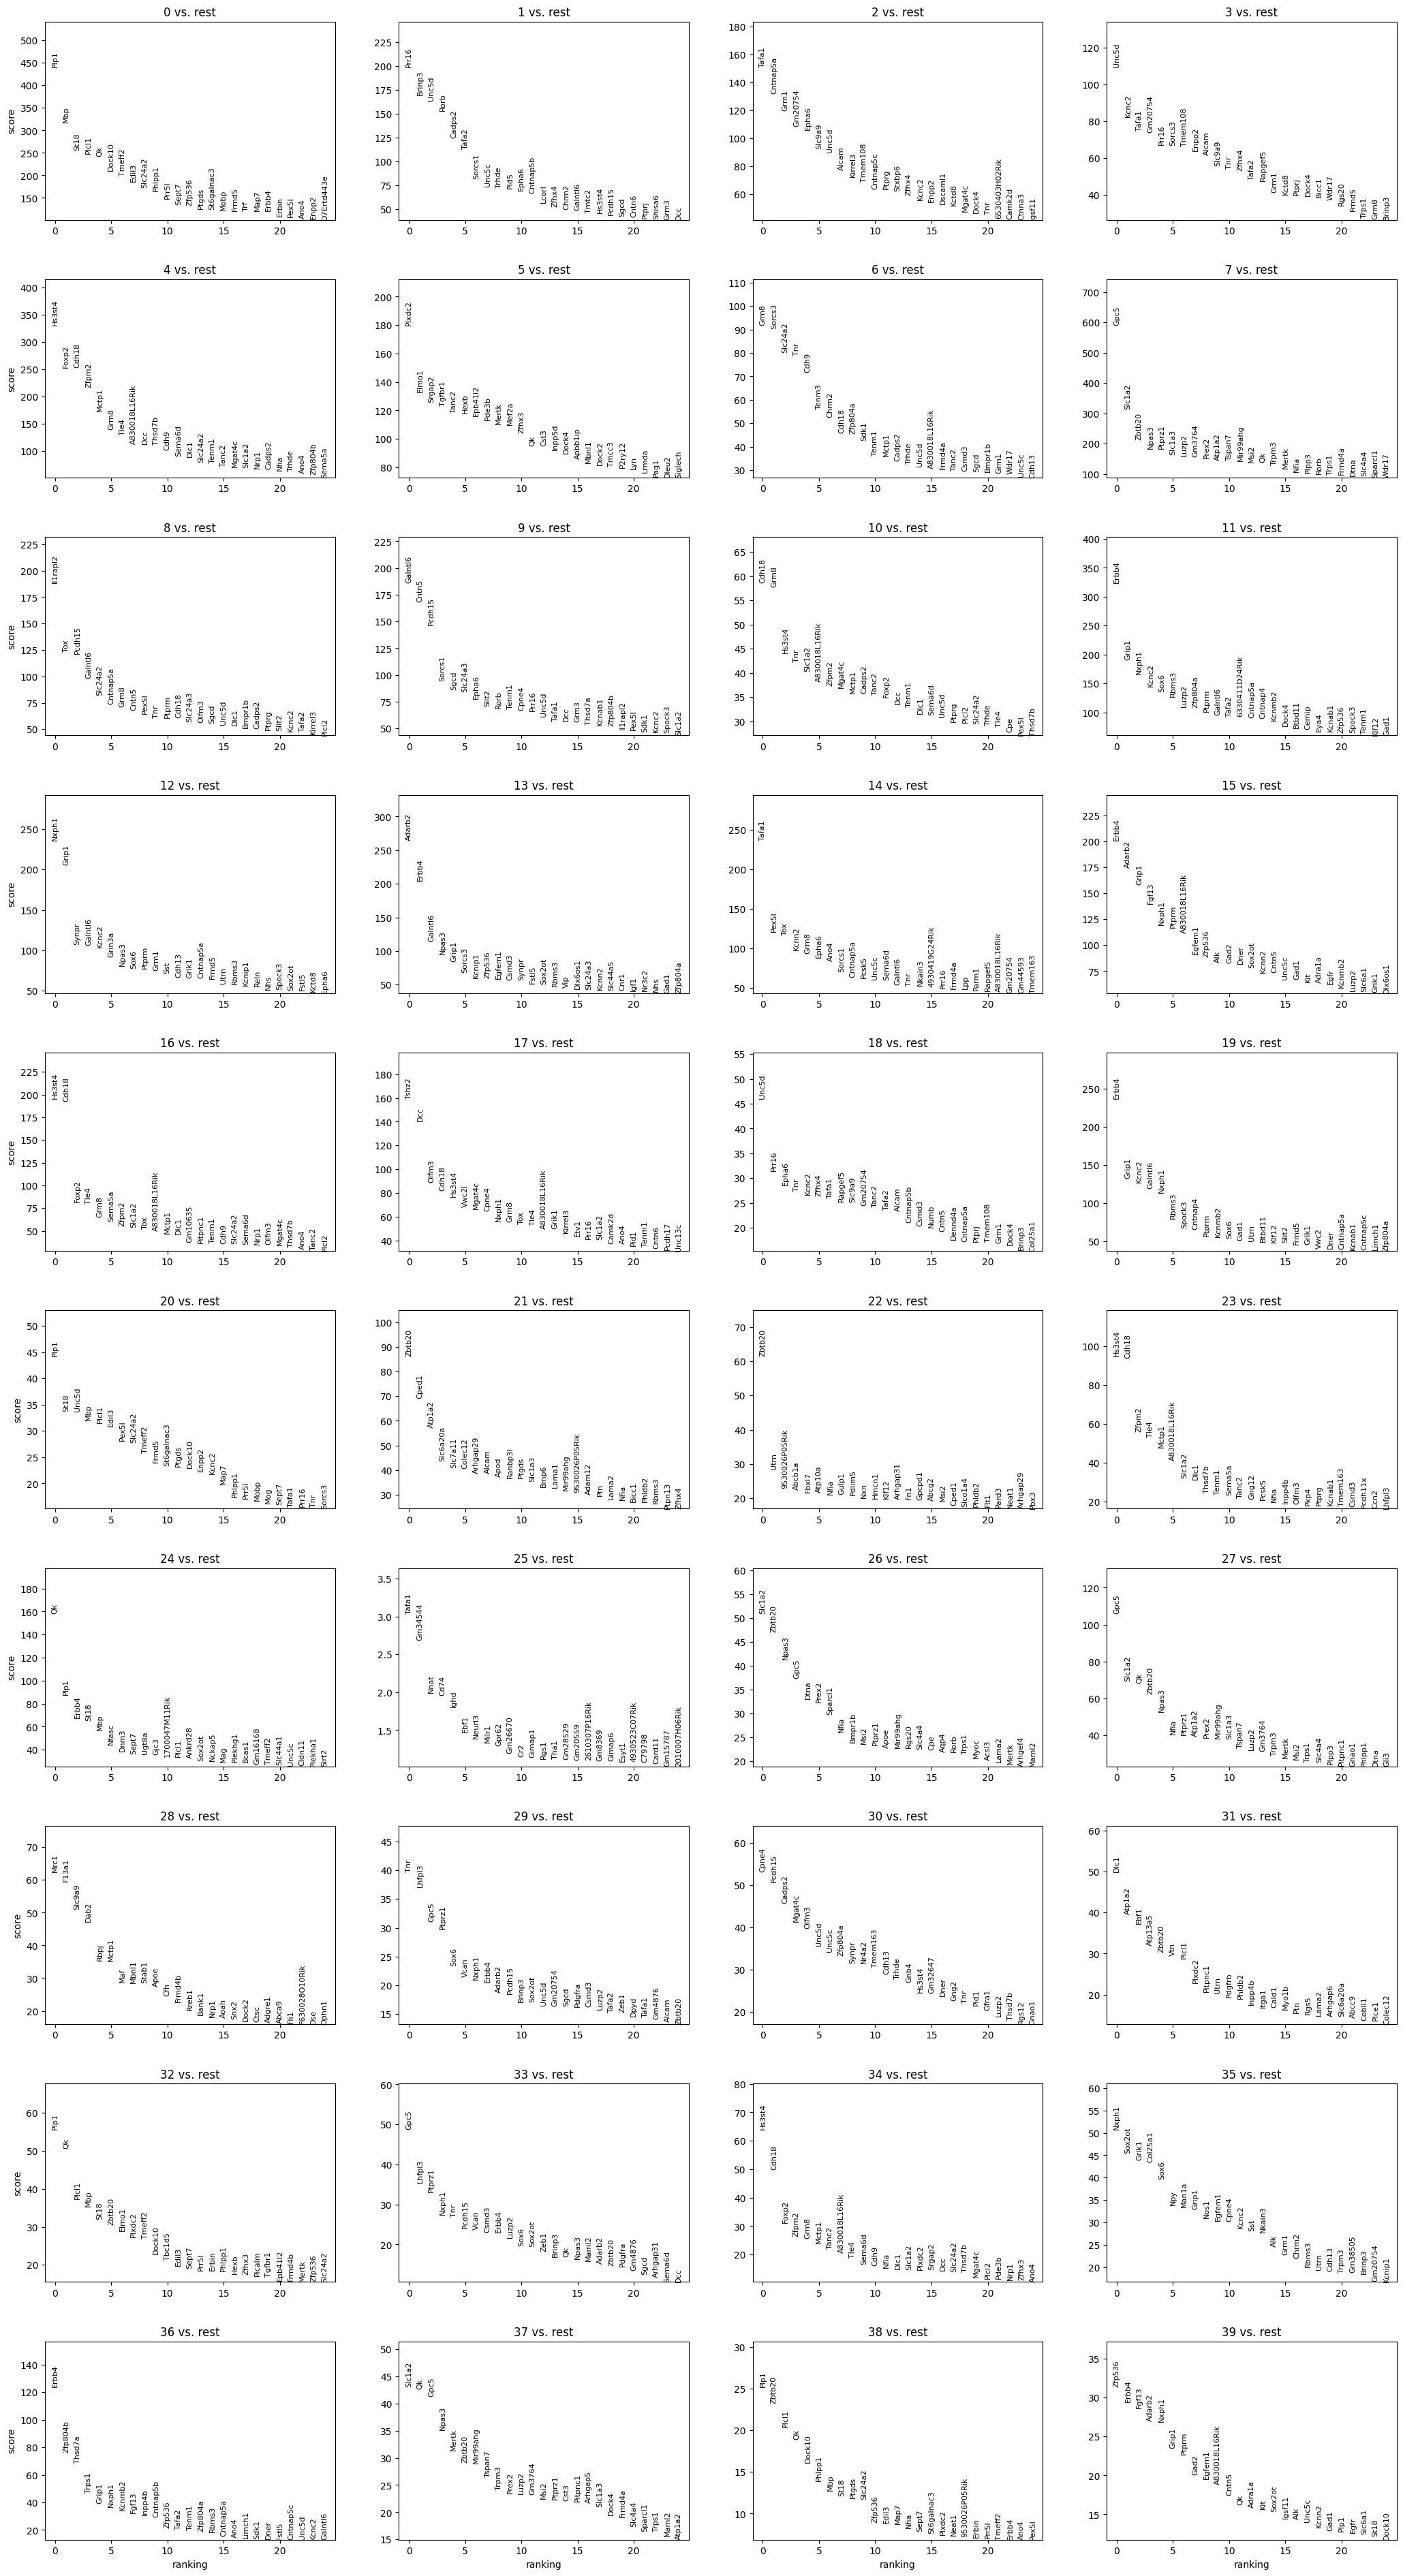

     0_names  0_pvals  1_names  1_pvals   2_names  2_pvals  3_names  3_pvals  \
0       Plp1      0.0    Prr16      0.0     Tafa1      0.0    Unc5d      0.0   
1        Mbp      0.0   Brinp3      0.0  Cntnap5a      0.0    Kcnc2      0.0   
2       St18      0.0    Unc5d      0.0      Grm1      0.0    Tafa1      0.0   
3      Plcl1      0.0     Rorb      0.0   Gm20754      0.0  Gm20754      0.0   
4         Qk      0.0   Cadps2      0.0     Epha6      0.0    Prr16      0.0   
...      ...      ...      ...      ...       ...      ...      ...      ...   
4609   Klf12      0.0   Dock10      0.0        Qk      0.0   Kcnab1      0.0   
4610   Mctp1      0.0   Zfp536      0.0    Kcnab1      0.0    Ptprm      0.0   
4611     Tnr      0.0    Luzp2      0.0     Ptprm      0.0    Erbb4      0.0   
4612   Ptprg      0.0       Qk      0.0       Tox      0.0   Zbtb20      0.0   
4613   Plcl2      0.0  Dscaml1      0.0    Hs3st4      0.0       Qk      0.0   

      4_names  4_pvals  ... 35_names   

In [31]:
# Preprocess the data
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]


# Run PCA and clustering
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)

# Identify marker genes
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

marker_genes = adata.uns['rank_genes_groups']
groups = marker_genes['names'].dtype.names
marker_genes_df = pd.DataFrame(
    {group + '_' + key: marker_genes[key][group]
     for group in groups for key in ['names', 'pvals']}
)

# Save or display the marker genes
marker_genes_df.to_csv('marker_genes.csv')
print(marker_genes_df)


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

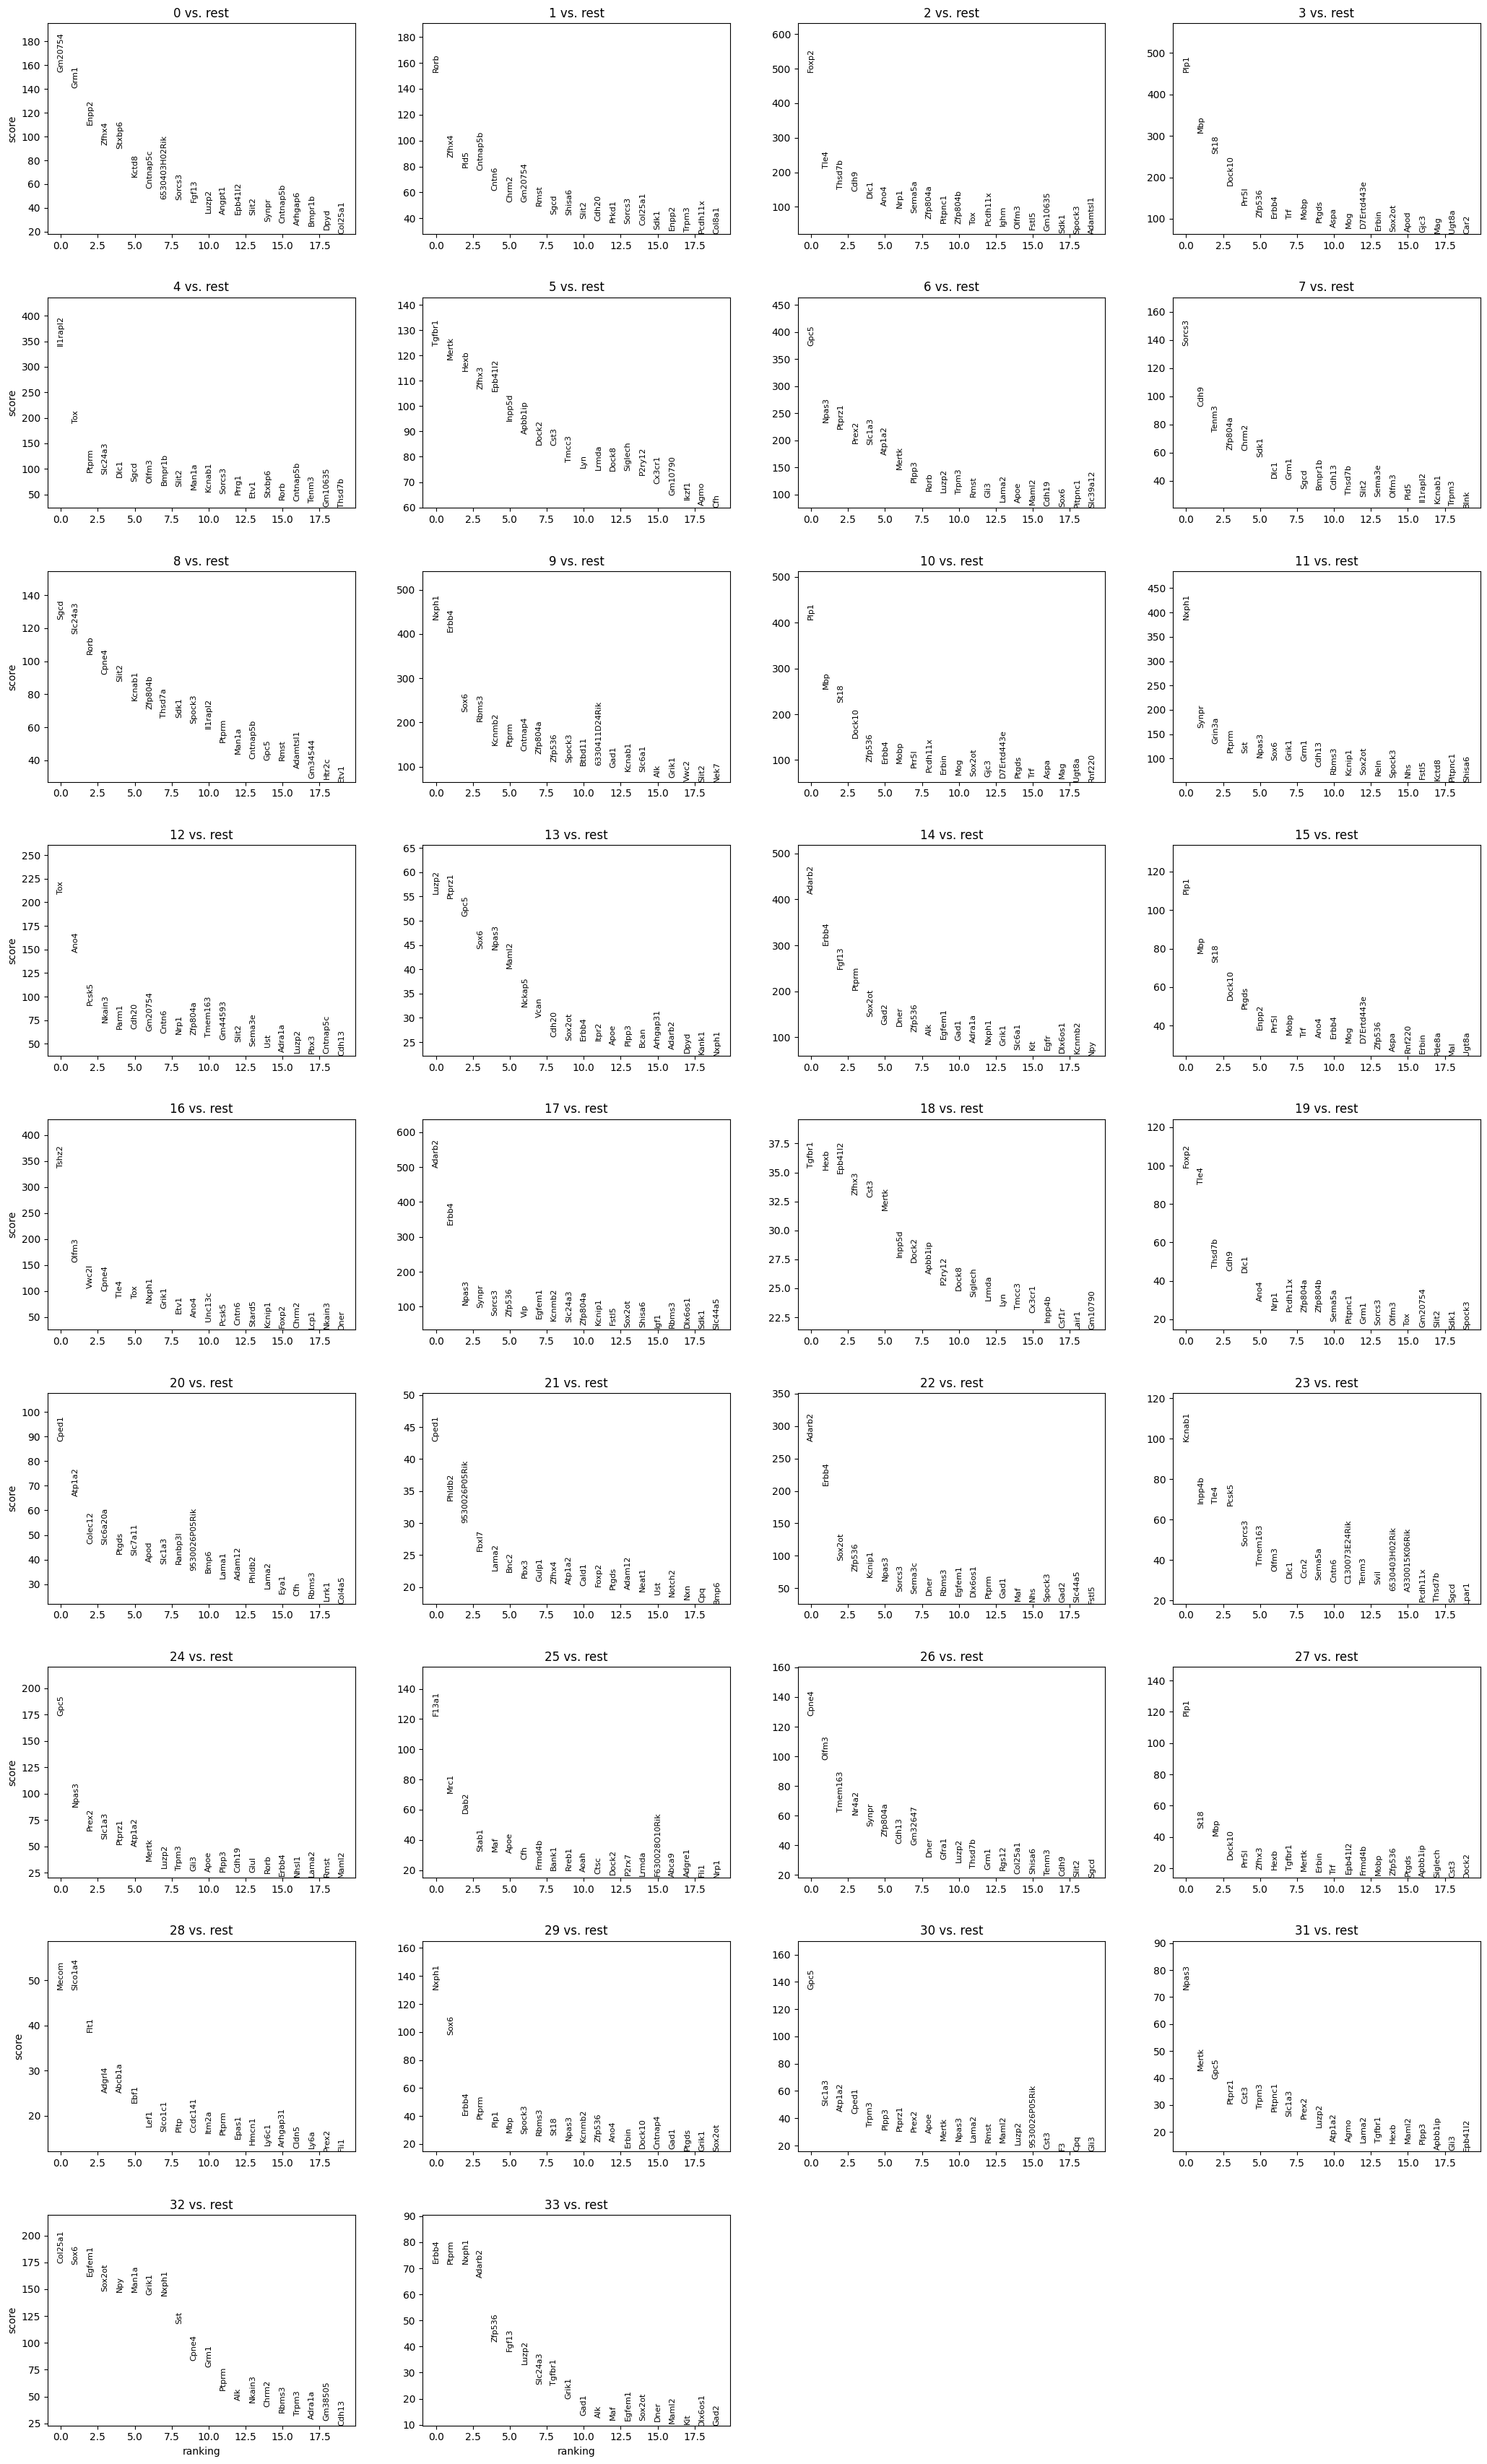

         0         1       2       3         4        5       6        7  \
0  Gm20754      Rorb   Foxp2    Plp1  Il1rapl2   Tgfbr1    Gpc5   Sorcs3   
1     Grm1     Zfhx4    Tle4     Mbp       Tox    Mertk   Npas3     Cdh9   
2    Enpp2      Pld5  Thsd7b    St18     Ptprm     Hexb  Ptprz1    Tenm3   
3    Zfhx4  Cntnap5b    Cdh9  Dock10   Slc24a3    Zfhx3   Prex2  Zfp804a   
4   Stxbp6     Cntn6    Dlc1   Prr5l      Dlc1  Epb41l2  Slc1a3    Chrm2   

         8       9  ...      24     25       26      27       28     29  \
0     Sgcd   Nxph1  ...    Gpc5  F13a1    Cpne4    Plp1    Mecom  Nxph1   
1  Slc24a3   Erbb4  ...   Npas3   Mrc1    Olfm3    St18  Slco1a4   Sox6   
2     Rorb    Sox6  ...   Prex2   Dab2  Tmem163     Mbp     Flt1  Erbb4   
3    Cpne4   Rbms3  ...  Slc1a3  Stab1    Nr4a2  Dock10   Adgrl4  Ptprm   
4    Slit2  Kcnmb2  ...  Ptprz1    Maf    Synpr   Prr5l   Abcb1a   Plp1   

       30      31       32      33  
0    Gpc5   Npas3  Col25a1   Erbb4  
1  Slc1a3   Mertk 

In [ ]:
# Rank genes for each cluster (using t-test by default)
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test', n_genes=400)

# You can plot the top ranked genes if you like
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

# Extract the top 400 genes
marker_genes = adata.uns['rank_genes_groups']
top_genes = pd.DataFrame({
    group: marker_genes['names'][group][:400]
    for group in marker_genes['names'].dtype.names
})

# Save the list of top 400 genes to a CSV file
top_genes.to_csv('top_400_marker_genes.csv', index=False)
print(top_genes.head())


In [ ]:
# Rank genes for each cluster using t-test
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test', n_genes=300)

# Extract the top 300 genes for each cluster
marker_genes = adata.uns['rank_genes_groups']
top_genes = pd.DataFrame({
    group: marker_genes['names'][group][:300]
    for group in marker_genes['names'].dtype.names
})

# Save the list of top 400 genes for each cluster to a CSV file
top_genes.to_csv('mouse_motor_cortex_top_300_marker_genes.csv', index=False)
print(top_genes.head())


         0         1       2       3         4        5       6        7  \
0  Gm20754      Rorb   Foxp2    Plp1  Il1rapl2   Tgfbr1    Gpc5   Sorcs3   
1     Grm1     Zfhx4    Tle4     Mbp       Tox    Mertk   Npas3     Cdh9   
2    Enpp2      Pld5  Thsd7b    St18     Ptprm     Hexb  Ptprz1    Tenm3   
3    Zfhx4  Cntnap5b    Cdh9  Dock10   Slc24a3    Zfhx3   Prex2  Zfp804a   
4   Stxbp6     Cntn6    Dlc1   Prr5l      Dlc1  Epb41l2  Slc1a3    Chrm2   

         8       9  ...      24     25       26      27       28     29  \
0     Sgcd   Nxph1  ...    Gpc5  F13a1    Cpne4    Plp1    Mecom  Nxph1   
1  Slc24a3   Erbb4  ...   Npas3   Mrc1    Olfm3    St18  Slco1a4   Sox6   
2     Rorb    Sox6  ...   Prex2   Dab2  Tmem163     Mbp     Flt1  Erbb4   
3    Cpne4   Rbms3  ...  Slc1a3  Stab1    Nr4a2  Dock10   Adgrl4  Ptprm   
4    Slit2  Kcnmb2  ...  Ptprz1    Maf    Synpr   Prr5l   Abcb1a   Plp1   

       30      31       32      33  
0    Gpc5   Npas3  Col25a1   Erbb4  
1  Slc1a3   Mertk 

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Other Criterion


In [ ]:
# Assuming `adata.var['expression']` contains expression levels
threshold = 1000  # Define an appropriate threshold for your data
feasible_genes = gene_list[adata.var['gene_ids'], threshold]


TypeError: list indices must be integers or slices, not tuple

In [ ]:
import pandas as pd
from Bio import SeqIO

# Assuming your gene list is in a CSV file with columns 'Gene ID' and 'Gene Name'
gene_list_df = pd.read_csv('your_gene_list.csv')

# Load the gene sequences (if available)
def load_sequences(gene_file):
    records = SeqIO.parse(gene_file, "fasta")
    return {record.id: str(record.seq) for record in records}

sequences_dict = load_sequences('gene_sequences.fasta')

# If you have sequence data, you can filter by gene name
filtered_genes = gene_list_df[gene_list_df['Gene Name'].isin(sequences_dict.keys())]

# Perform analyses, e.g., check conservation scores, functional annotations, etc.
# For example, using Entrez API from NCBI:
from Bio import Entrez
Entrez.email = "your_email@example.com"  # Replace with your email

# Use Entrez.efetch to fetch annotation data for specific genes
specific_genes = filtered_genes['Gene Name'].tolist()
annotation_results = [Entrez.efetch(db="nuccore", id=gn, retmode="xml") for gn in specific_genes]

ModuleNotFoundError: No module named 'Bio'